# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺾은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

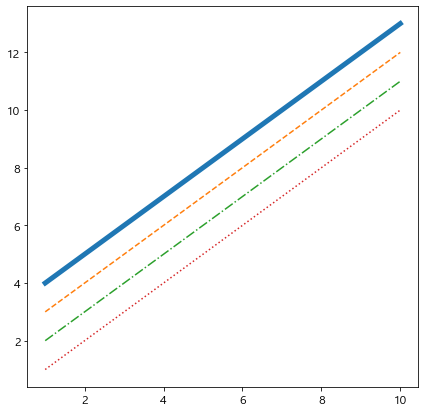

In [2]:
x = np.linspace(1, 10, num=100)

plt.figure(figsize=(7,7))
# x, y
plt.plot(x, x+3, linewidth=5)
plt.plot(x, x+2, linestyle='--')
plt.plot(x, x+1, linestyle='-.')
plt.plot(x, x, linestyle=':')

plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


In [5]:
df.rename({'최대농도(㎍/㎥/시)':'최대농도'}, axis=1, inplace=True)

In [6]:
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


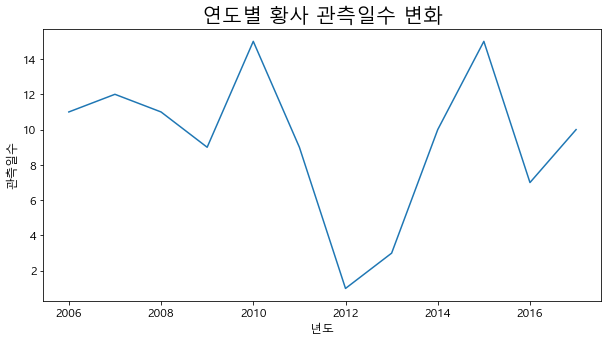

In [7]:
# 년도에 따른 관측일수의 변화 흐름
plt.figure(figsize=(10,5))
# X축: 시작 - 년도, Y측: 값 : 관측일수
plt.plot(df['년도'], df['관측일수'])
plt.title("연도별 황사 관측일수 변화")
plt.xlabel('년도')
plt.ylabel('관측일수')

plt.show()

In [8]:
#df['년도']
df['관측일수']

0     11
1     12
2     11
3      9
4     15
5      9
6      1
7      3
8     10
9     15
10     7
11    10
Name: 관측일수, dtype: int64

In [9]:
# 년도에 따른 주의보와 경보 발령 횟수의 변화의 흐름을 한 subplot에 그리기


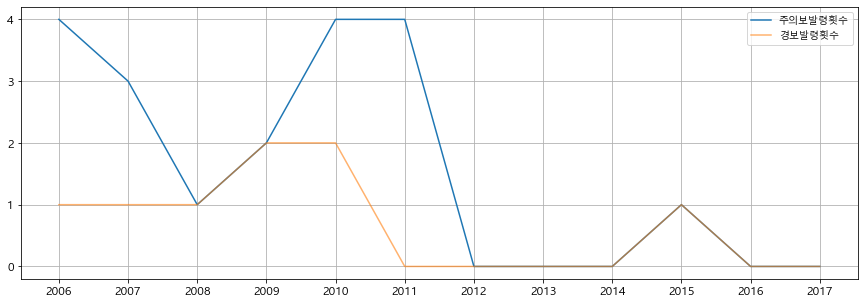

In [10]:
plt.figure(figsize=(15,5))

plt.plot(df['년도'], df['주의보 발령횟수'], label='주의보발령횟수')
plt.plot(df['년도'], df['경보 발령횟수'], label='경보발령횟수', alpha=0.6)

# ticks 설정
plt.xticks(df['년도'])
plt.yticks([0,1,2,3,4])  #range(0, 5)

plt.legend()
plt.grid(True)
plt.show()

In [11]:
df['경보 발령횟수'].unique()

array([1, 2, 0], dtype=int64)

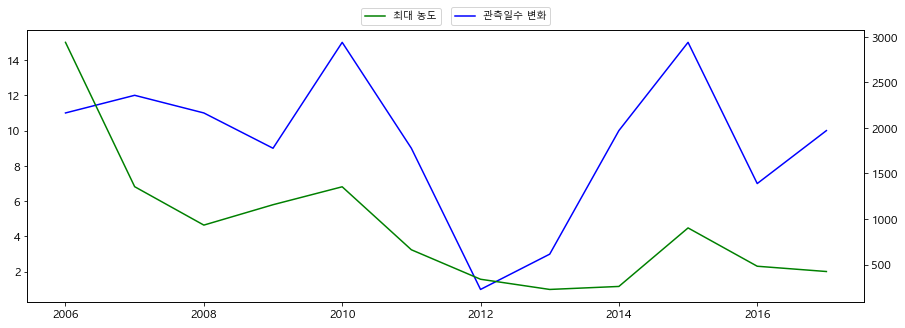

In [12]:
fig, ax1 = plt.subplots(figsize=(15,5))  #행, 열의 개수를 생략 -> axes(subplot) 1개
# print(type(ax))
ax2 = ax1.twinx()

ax1.plot(df['년도'], df['관측일수'], label="관측일수 변화", color='b')
ax2.plot(df['년도'], df['최대농도'], label="최대 농도" ,color='g')

# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
ax1.legend(bbox_to_anchor=(0.5, 1), loc='lower left')
ax2.legend(bbox_to_anchor=(0.5, 1), loc='lower right')

plt.show()

### legend box 위치 지정
- loc="수직방향위치 수평방향위치"
    - axes box내에 legend box를 위치시킬 때 사용
    - 수직방향위치: lower, upper
    - 수평방향위치: left, right
    - 정가운데: center
    - 기본: best
- bbox_to_anchor, loc
    - axes box 밖에 legend box를 위치시킬 때 사용
    - bbox_to_anchor: 0 ~ 1 사이의 실수. legend box를 axes box기준 어디에 둘 것인지 지정(x축위치, y축위치)
    - loc: legend box를 axes box의 어느 부분을 기준으로 놓을 것인지

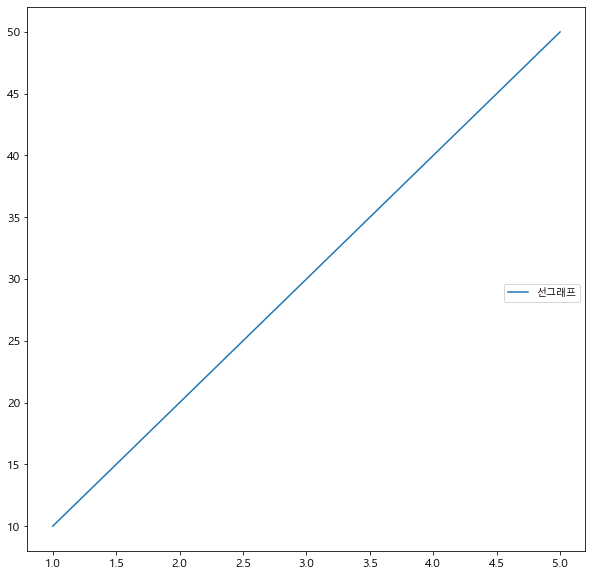

In [13]:
plt.figure(figsize=(10,10))

plt.plot([1,2,3,4,5], [10,20,30,40,50], label='선그래프')

# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

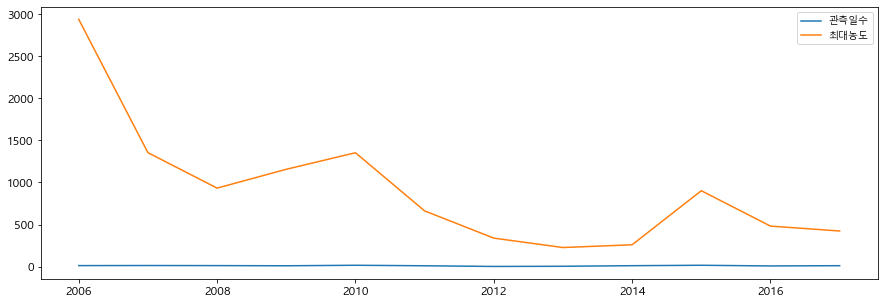

In [14]:
plt.figure(figsize=(15,5))

plt.plot(df['년도'], df['관측일수'], label='관측일수')
plt.plot(df['년도'], df['최대농도'], label='최대농도')

plt.legend()
plt.show()

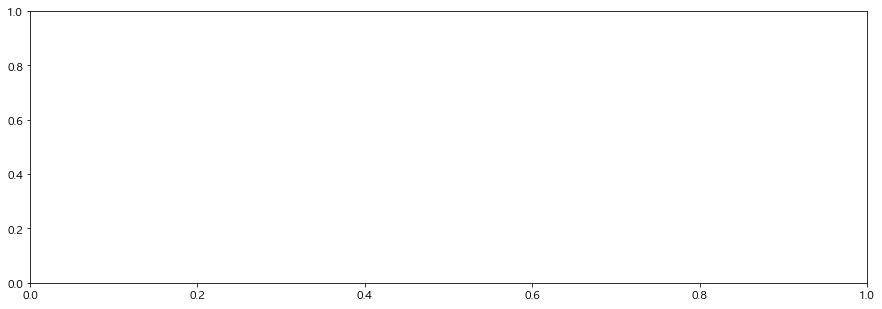

In [15]:
fig, ax = plt.subplots(figsize=(15,5))  #행, 열의 개수를 생략 -> axes(subplot) 1개

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
x = np.arange(1, 1000, 50)
y = np.arange(1, 1000, 50)
z = np.arange(1, 1000, 20)
print(x.shape)

(20,)


In [21]:
for d in zip(x, y):
    print(d)

(1, 1)
(51, 51)
(101, 101)
(151, 151)
(201, 201)
(251, 251)
(301, 301)
(351, 351)
(401, 401)
(451, 451)
(501, 501)
(551, 551)
(601, 601)
(651, 651)
(701, 701)
(751, 751)
(801, 801)
(851, 851)
(901, 901)
(951, 951)


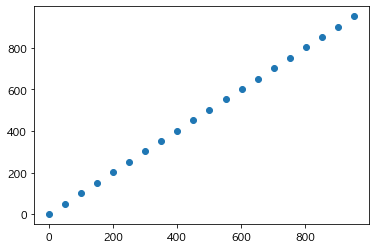

In [18]:
plt.scatter(x, y)
plt.show()

ValueError: x and y must be the same size

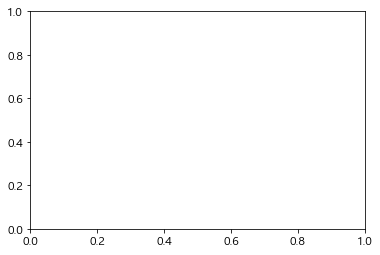

In [22]:
# plt.scatter(x, z)  #x, y축에 들어가는 값들의 개수는 동일해야함

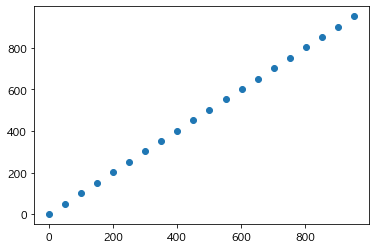

In [25]:
plt.scatter(x,y)
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/api/markers_api.html
- s
    - 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)
  

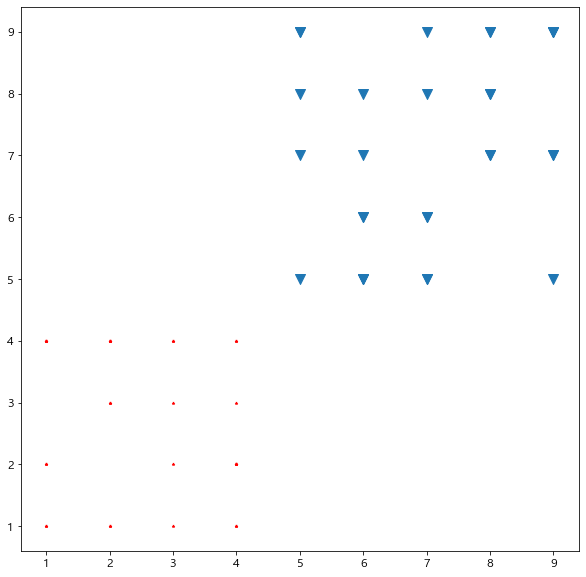

In [31]:
np.random.seed(0)
plt.figure(figsize=(10,10))

plt.scatter(x=np.random.randint(1, 5, 30),
            y=np.random.randint(1, 5, 30), 
            marker='2', 
            s = 10, 
            color='r')

plt.scatter(x=np.random.randint(5, 10, 30),
            y=np.random.randint(5, 10, 30), 
            marker='v', 
            s = 100)

plt.show()

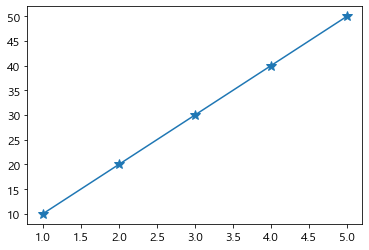

In [35]:
plt.plot([1,2,3,4,5], [10,20,30,40,50], marker='*', markersize=10)
# plt.scatter([1,2,3,4,5],[10,20,30,40,50])
plt.show()

## 2.3 산점도 활용

In [37]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


### 경보 발령횟수와 관측일수 간의 관계

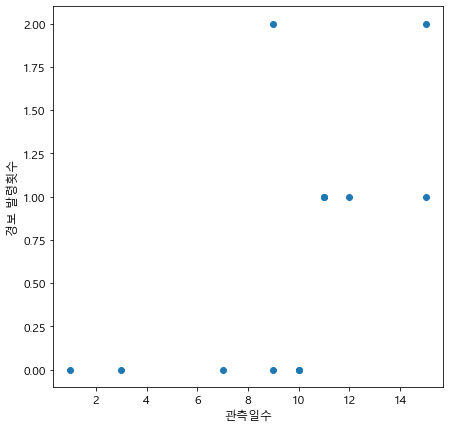

In [38]:
plt.figure(figsize=(7,7))
plt.scatter(df['관측일수'], df['경보 발령횟수'])
plt.xlabel('관측일수')
plt.ylabel('경보 발령횟수')
plt.show()

- 상관계수
    - 두 변수(컬럼) 간의 상관관계를 계산한 값
    - 양의 상관관계: 변수 하나의 값이 증가할 때 다른 하나도 같이 증가
        - 0 ~ 1 (양수)
    - 음의 상관관계: 변수 하나의 값이 증가할 때 다른 하나는 감소
        - -1 ~ 0 (음수)
    - numpy.corrcoef(변수, 변수) - 변수는 array_like(배열, 리스트, Series)
    - pd.corr()
        - -1 ~ 1 
        - 1 ~ 0.7 : 아주 강한 상관관계
        - 0.7 ~ 0.3 : 강한 상관관계
        - 0.3 ~ 0.1 : 약한 상관관계
        - 0.1 ~ 0 : 관계 없다

In [43]:
corr = np.corrcoef(df['관측일수'], df['경보 발령횟수'])

In [40]:
df[['관측일수','경보 발령횟수']].corr()

,관측일수,경보 발령횟수
관측일수,1.000000,0.604161
경보 발령횟수,0.604161,1.000000


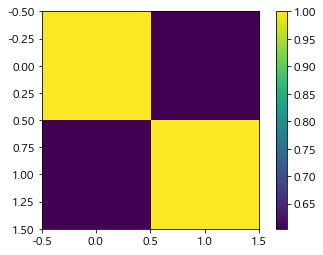

In [52]:
# 상관관계를 heatmap으로 시각화
plt.imshow(corr)
plt.colorbar()
plt.show()

In [53]:
df.corr()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
년도,1.000000,-0.706913,-0.612401,-0.582975,-0.501745,-0.201694,-0.733651
주의보 발령횟수,-0.706913,1.000000,0.975781,0.562544,0.566468,0.515552,0.735472
주의보 발령일수,-0.612401,0.975781,1.000000,0.468807,0.484182,0.477142,0.623823
경보 발령횟수,-0.582975,0.562544,0.468807,1.000000,0.968246,0.604161,0.587026
경보 발령일수,-0.501745,0.566468,0.484182,0.968246,1.000000,0.611976,0.645936
관측일수,-0.201694,0.515552,0.477142,0.604161,0.611976,1.000000,0.471453
최대농도,-0.733651,0.735472,0.623823,0.587026,0.645936,0.471453,1.000000


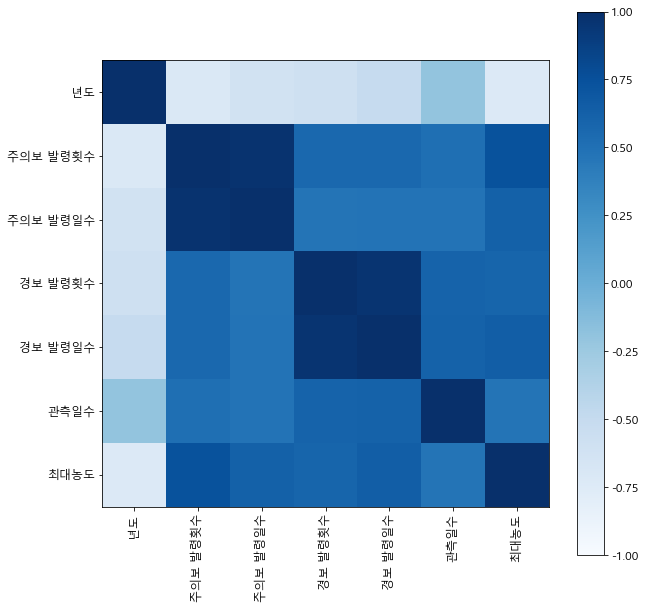

In [67]:
plt.figure(figsize=(10,10))
plt.imshow(df.corr(), cmap='Blues', vmin=-1, vmax=1)

plt.yticks(ticks=range(df.columns.size), labels=df.columns)
plt.xticks(ticks=range(df.columns.size), labels=df.columns, rotation=90)

plt.colorbar()
plt.show()

In [56]:
df.columns

Index(['년도', '주의보 발령횟수', '주의보 발령일수', '경보 발령횟수', '경보 발령일수', '관측일수', '최대농도'], dtype='object')

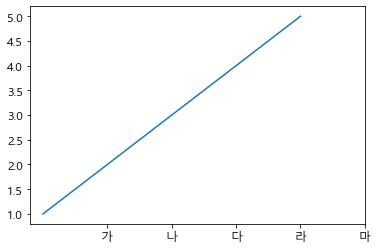

In [61]:
plt.plot([1,2,3,4,5])
# plt.xticks([10,20,30,40,50])
plt.xticks(ticks=[1,2,3,4,5], labels=['가', '나', '다', '라', '마'])
plt.show()

In [68]:
dia = pd.read_csv('data/diamonds.csv')
dia.shape

(53940, 10)

In [69]:
dia.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

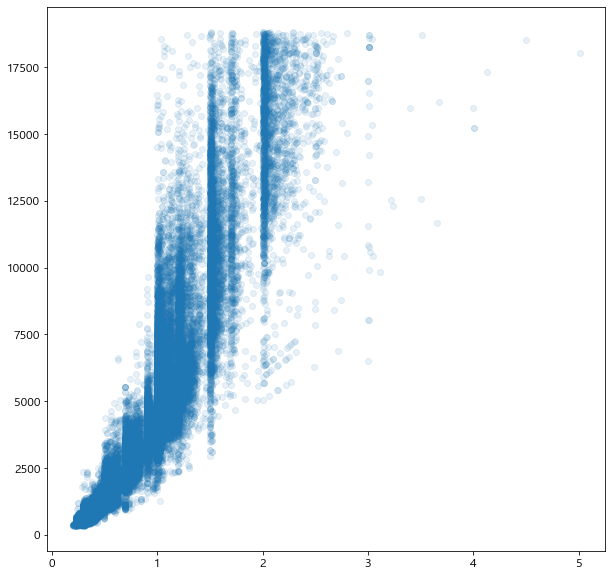

In [71]:
# carat과 price 간의 관계를 산점도로 시각화
plt.figure(figsize=(10,10))
plt.scatter(dia['carat'], dia['price'], alpha=0.1)
plt.show()

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    

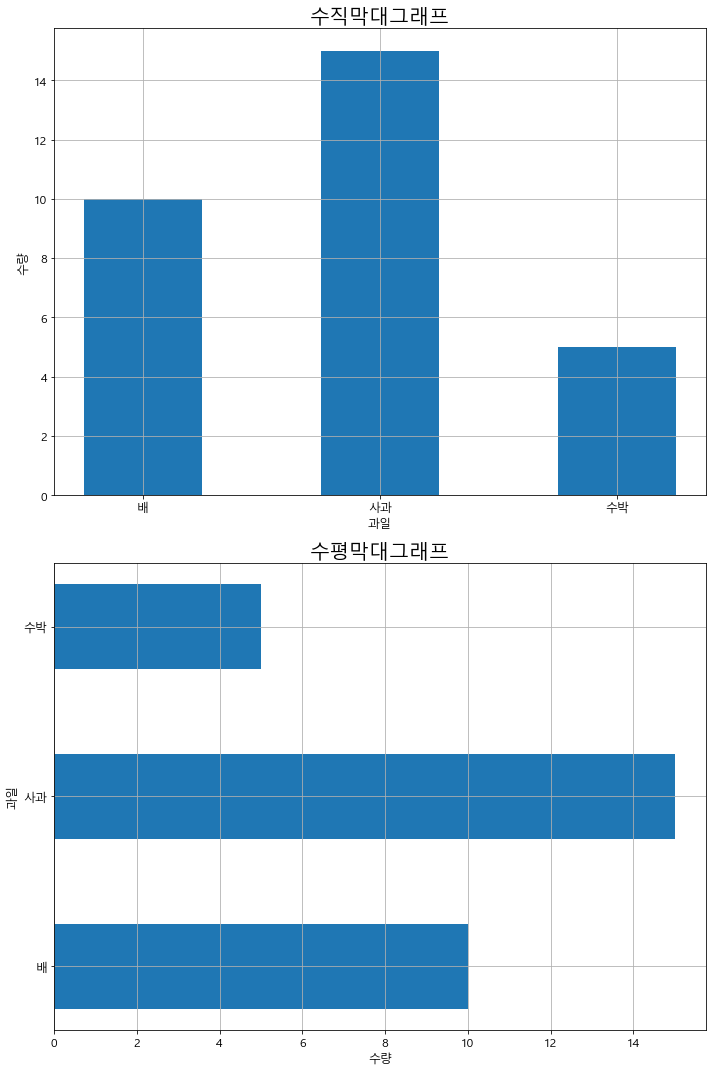

In [81]:
import numpy as np
import matplotlib.pyplot as plt

fruits = ['배', '사과', '수박']
amount = [10, 15, 5]
fig, axes = plt.subplots(2, 1, figsize=(10,15))
axes[0].bar(fruits, amount, width=0.5)  #0 ~ 1 (기본: 0.8)
axes[0].set_title('수직막대그래프')
axes[0].set_xlabel('과일')
axes[0].set_ylabel('수량')
axes[0].grid(True)

axes[1].barh(fruits, amount, height=0.5)
axes[1].set_title('수평막대그래프')
axes[1].set_ylabel('과일')
axes[1].set_xlabel('수량')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)
- 2018년 계절별 강수량

In [83]:
import pandas as pd
df = pd.read_excel('data/강수량.xlsx')
df.set_index('계절', inplace=True)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


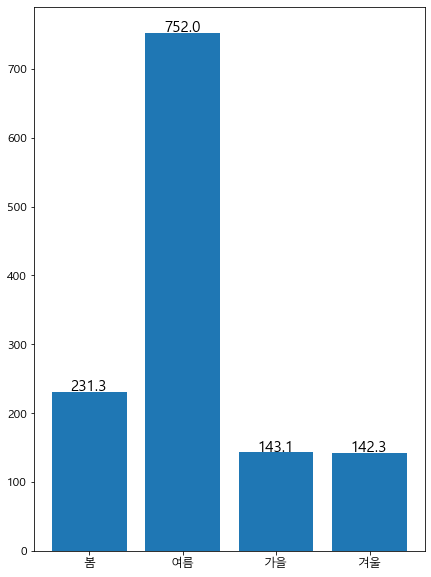

In [89]:
# 2009년 계절별 강수량 비교
plt.figure(figsize=(7, 10))
plt.bar(df.index, df[2009])

# plt.text(0, 231.3, "231.3")
for idx, rain in enumerate(df[2009]):
    plt.text(idx-0.2, rain+1, rain, fontsize=15)

plt.show()

In [90]:
# 년도별 봄의 강수량
df.figure(figsize=(10,10))

plt.bar()

plt.show()

AttributeError: 'DataFrame' object has no attribute 'figure'

In [91]:
dia['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [92]:
clarity_cnt = dia['clarity'].value_counts()
clarity_cnt

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [93]:
plt.bar(clarity_cnt.index, clarity_cnt)

TypeError: bar() missing 1 required positional argument: 'height'